In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install yfinance

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline
from IPython.display import display, HTML

In [5]:
df_company = pd.read_csv('sp500_companies.csv')

In [6]:
df_company = df_company.drop(['State'], axis=1)

In [19]:
# df_company[df_company['Revenuegrowth'].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight


In [18]:
def replace_null(df, sym, col, missing):
    ticker = yf.Ticker(sym)
    df.loc[df['Symbol']==sym, col]= ticker.info[missing]

replace_null(df_company,'MA', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'MCD', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'MSCI', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'XEL', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'PCG', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'DTE', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'MAA', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'WST', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'TXT', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'SWK', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'WDC', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'TFX', 'Revenuegrowth', 'revenueGrowth')
replace_null(df_company,'CMCSA', 'Revenuegrowth', 'revenueGrowth')

In [20]:
# df_company[df_company['Fulltimeemployees'].isnull()]

In [9]:
df_company.loc[df_company['Fulltimeemployees'].isnull(), 'Fulltimeemployees'] = df_company['Fulltimeemployees'].mode()[0]

In [21]:
# df_company[df_company['Ebitda'].isnull()].head(3)

In [23]:
missing_EBITDA = df_company[df_company['Ebitda'].isnull()]
count_EBITDA = missing_EBITDA.groupby(['Sector', 'Industry'])['Industry'].count()
count_EBITDA

Sector                  Industry                        
Communication Services  Telecom Services                     1
Consumer Cyclical       Restaurants                          1
Financial Services      Asset Management                     3
                        Banks—Diversified                    4
                        Banks—Regional                      14
                        Capital Markets                      4
                        Credit Services                      5
                        Financial Data & Stock Exchanges     1
                        Insurance—Reinsurance                1
Healthcare              Medical Instruments & Supplies       2
Industrials             Aerospace & Defense                  1
                        Tools & Accessories                  1
Real Estate             REIT—Residential                     1
Technology              Computer Hardware                    1
Utilities               Utilities—Regulated Electric         

# The leading sector in S&P 500

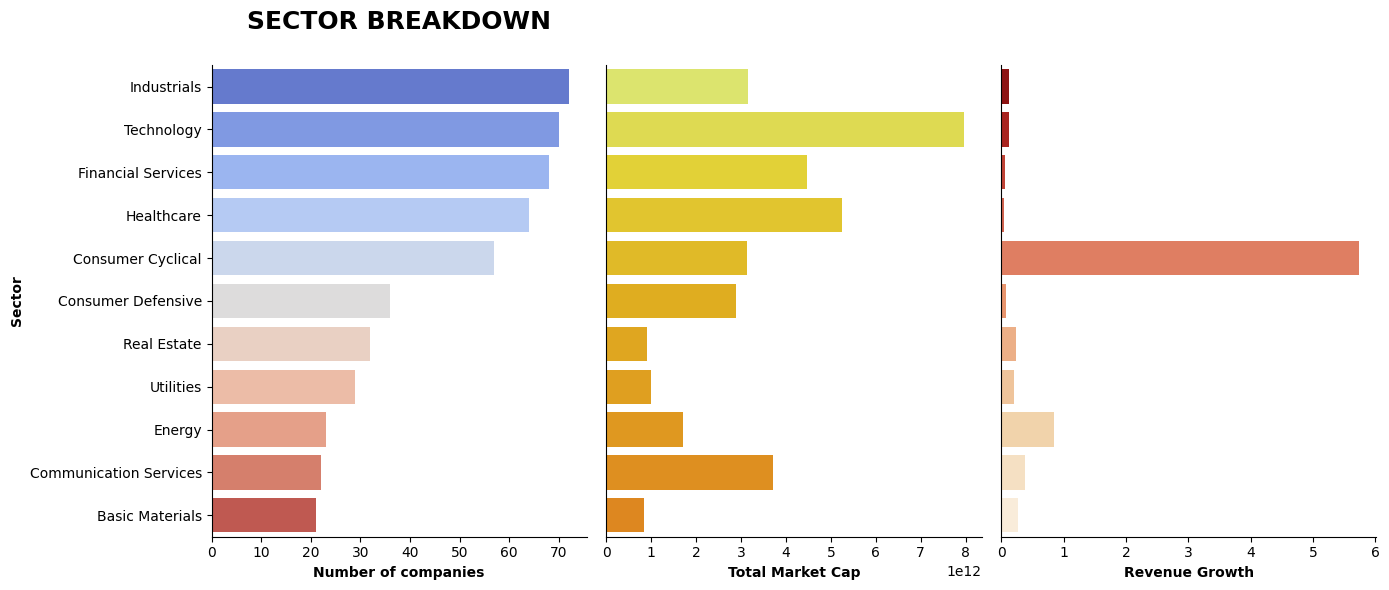

In [13]:
f = {'Revenuegrowth':['mean'], 'Marketcap':['sum'], 'Longname':['count']}

sector_breakdown = df_company.groupby('Sector').agg(f)
sector_breakdown.columns = sector_breakdown.columns.get_level_values(0)
sector_breakdown = sector_breakdown.reset_index()
sector_breakdown = sector_breakdown.sort_values('Longname', ascending=False)

fig = plt.figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="Longname", y="Sector", data=sector_breakdown, palette=('coolwarm'))
ax1.set_xlabel('Number of companies', weight='bold')
ax1.set_ylabel('Sector', weight = 'bold')
ax1.set_title('SECTOR BREAKDOWN\n', weight='bold').set_fontsize('18')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="Marketcap", y="Sector", data=sector_breakdown, palette=('Wistia'))
ax2.set_xlabel('Total Market Cap', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="Revenuegrowth", y="Sector", data=sector_breakdown, palette=('OrRd_r'))
ax2.set_xlabel('Revenue Growth', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout()

# Top 10 Stock's Market Cap, EBIDTA & Full Time Employees Comparison

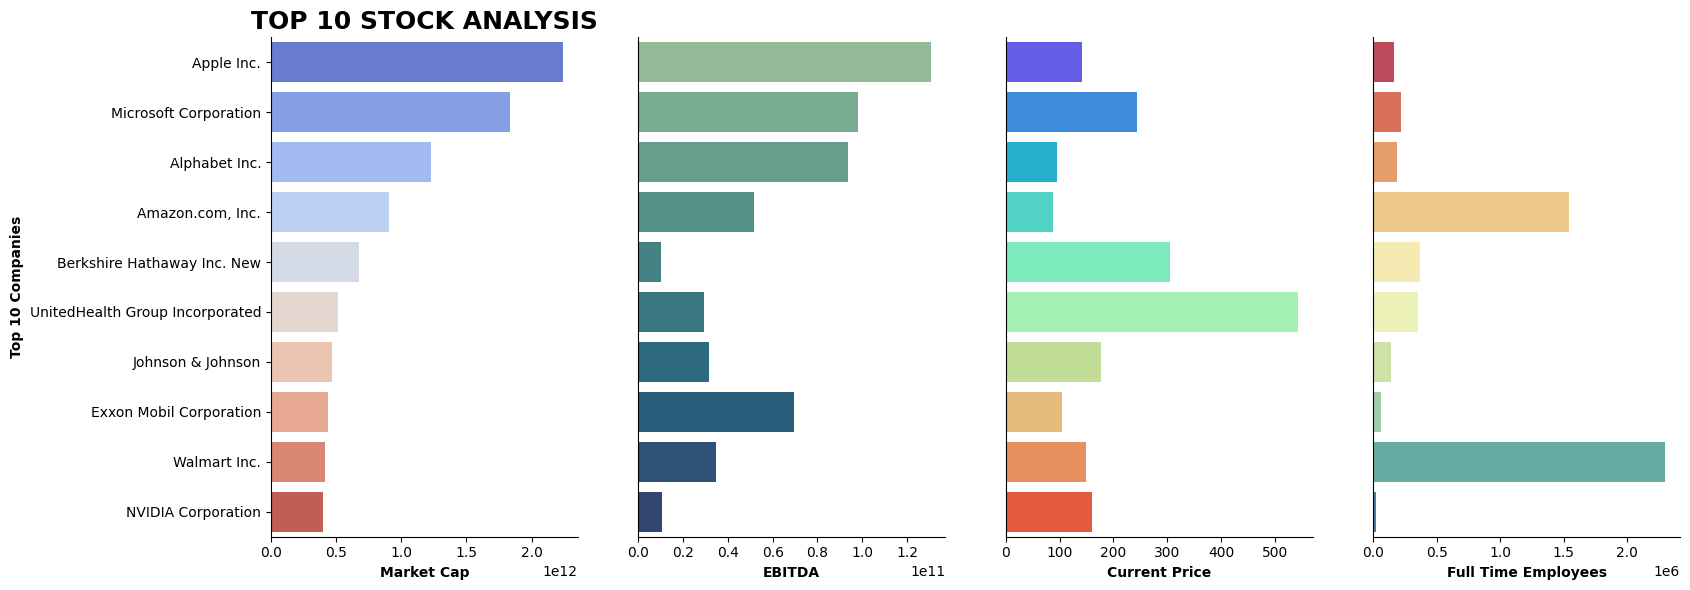

In [24]:
N = 11
fig2 = plt.figure(num=None, figsize=(17, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 4, 1)
ax1 = sns.barplot(x=df_company.iloc[:N,7], y=df_company.iloc[:N,2], data=df_company, palette=('coolwarm'))
ax1.set_xlabel('Market Cap', weight='bold')
ax1.set_ylabel('Top 10 Companies', weight = 'bold')
ax1.set_title('TOP 10 STOCK ANALYSIS', weight='bold').set_fontsize('18')
plt.subplot(1, 4, 2)
ax2 = sns.barplot(x=df_company.iloc[:N,8], y=df_company.iloc[:N,2], data=df_company, palette=('crest'))
ax2.set_xlabel('EBITDA', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 4, 3)
ax2 = sns.barplot(x=df_company.iloc[:N,6], y=df_company.iloc[:N,2], data=df_company, palette=('rainbow'))
ax2.set_xlabel('Current Price', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 4, 4)
ax2 = sns.barplot(x=df_company.iloc[:N,12], y=df_company.iloc[:N,2], data=df_company, palette=('Spectral'))
ax2.set_xlabel('Full Time Employees', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();